### Model for the paper analysis of multiple flows using different TCP protocol

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_CUBIC_discrete
C = 1000 # Bandwidth in packets per second
N = 100 # Number of states, i.e. granularity of the states 
RTT = 0.5 # Round trip time in seconds
B = RTT * C # Bandwidth-delay product in packets, this is the maximum congestion window size
p = 0.0001 # Loss probability
alpha = 4.0 # CUBIC parameter
beta = 0.7 # multiplicative decrease factor
RTT0 = 0.05 # Reference RTT in seconds
rho = max(RTT/RTT0,1) # For Hybla

# Definitions
def w(x,t):
    return alpha*(t-np.cbrt(x*(1-beta)/alpha))**3+x

def wn_cub(x,t,r):
    return alpha*(r*t-np.cbrt(x*(1-beta)/alpha))**3+x

def wn_reno(x,t,r):
    return x*beta+3*beta/(2-beta)*t # We could replace the factor in front of t with alpha_aimd to get a similar growth to reno with beta=0.5 and alpha_aimd=1.0
# This is just to be fair with other reno flows

def wn_hybla(x,t,r):
    return rho*(x*beta+3*beta/(2/rho-beta)*t)

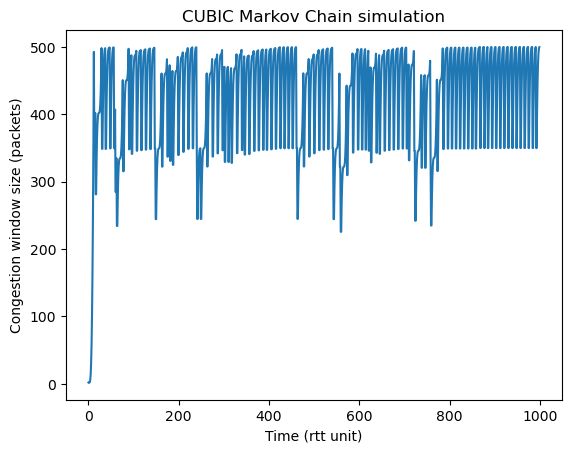

Average of the congestion window size in packets 420.33377579578433
Average throughput in packets per second 840.6675515915687


In [74]:
# Let's simulate the markov chain
# We will simulate the chain for 1000 time steps
states = np.zeros(1000)
T = 1000
initial_state = 2
epoch_state = initial_state
epoch_time = 0

for t in range(T):
    if t == 0:
        states[t] = initial_state
        continue
    prob_no_loss = (1-p)**(states[t-1])
    if np.random.choice([0,1],p=[prob_no_loss,1-prob_no_loss])==1:
        # Packet was lost
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    elif wn_cub(epoch_state,epoch_time,RTT) > B:
        # Congestion
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    else:
        # Packet was not lost
        states[t] = wn_cub(epoch_state,epoch_time,RTT)
        epoch_time += 1

plt.plot(states)
plt.title('CUBIC Markov Chain simulation')
plt.xlabel('Time (rtt unit)')
plt.ylabel('Congestion window size (packets)')
plt.show()
print("Average of the congestion window size in packets "+ str(np.average(states)))
print("Average throughput in packets per second "+ str(np.average(states)/RTT ))

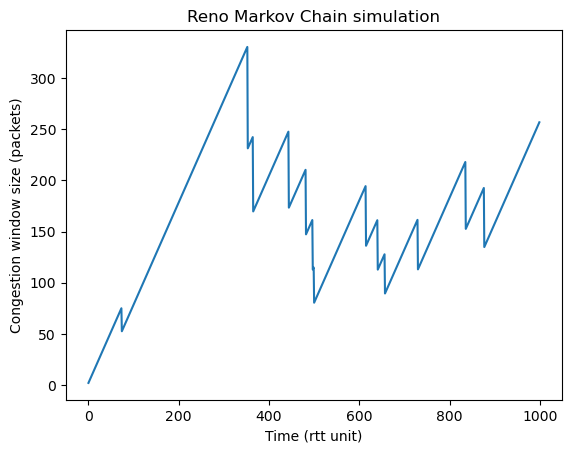

Average of the congestion window size in packets 165.00062193190712
Average throughput in packets per second 330.00124386381424


In [75]:
# Now Reno Markov Chain simulation
states = np.zeros(1000)
T = 1000
initial_state = 2
epoch_state = initial_state
epoch_time = 0
for t in range(T):
    if t == 0:
        states[t] = initial_state
        continue
    prob_no_loss = (1-p)**(states[t-1])
    if np.random.choice([0,1],p=[prob_no_loss,1-prob_no_loss])==1:
        # Packet was lost
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    elif wn_reno(epoch_state,epoch_time,RTT) > B:
        # Congestion
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    else:
        # Packet was not lost
        states[t] = states[t-1]+1
        #states[t] = wn_reno(epoch_state,epoch_time,RTT)
        epoch_time += 1

plt.plot(states)
plt.title('Reno Markov Chain simulation')
plt.xlabel('Time (rtt unit)')
plt.ylabel('Congestion window size (packets)')
plt.show()
print("Average of the congestion window size in packets "+ str(np.average(states)))
print("Average throughput in packets per second "+ str(np.average(states)/RTT ))

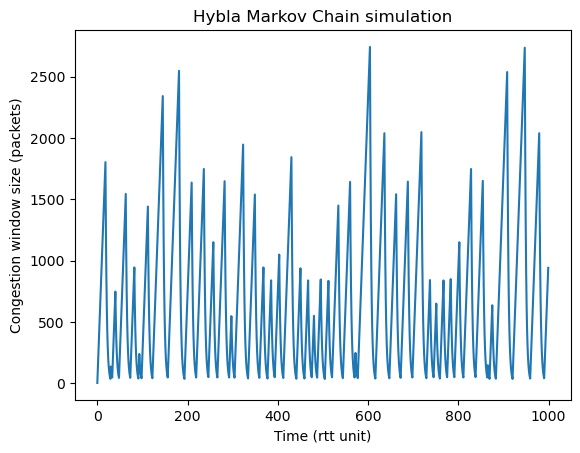

Average of the congestion window size in packets 671.8033849702365
Average throughput in packets per second 1343.606769940473


In [76]:
# Now Hybla Markov Chain simulation
states = np.zeros(1000)
T = 1000
initial_state = 2
epoch_state = initial_state
epoch_time = 0
for t in range(T):
    if t == 0:
        states[t] = initial_state
        continue
    prob_no_loss = (1-p)**(states[t-1])
    if np.random.choice([0,1],p=[prob_no_loss,1-prob_no_loss])==1:
        # Packet was lost
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    elif wn_hybla(epoch_state,epoch_time,RTT) > B:
        # Congestion
        states[t] = states[t-1]*beta
        epoch_state = states[t-1]
        epoch_time = 0
    else:
        # Packet was not lost
        states[t] = states[t-1]+ rho**2 
        #states[t]= wn_hybla(epoch_state,epoch_time,RTT)
        epoch_time += 1

plt.plot(states)
plt.title('Hybla Markov Chain simulation')
plt.xlabel('Time (rtt unit)')
plt.ylabel('Congestion window size (packets)')
plt.show()
print("Average of the congestion window size in packets "+ str(np.average(states)))
print("Average throughput in packets per second "+ str(np.average(states)/RTT ))